<a href="https://colab.research.google.com/github/sivaramaraju2124/Ybi-Foundation/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Title of the project***  : Movie Recommendation System
#***Objective***: The objective of a movie recommendation system is to suggest personalized and relevant movies to users based on their preferences and behaviors to enhance their viewing experience.
#***Data Source*** : Ybi foundation github






#**Import Libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [89]:
movies=pd.read_csv("/content/drive/MyDrive/Movies Recommendation.csv")

# **Describe Data**

In [90]:
movies.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [91]:
movies.shape

(4760, 21)

In [92]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [93]:
movies.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#**Data Visualization**

In [94]:
movies["Movie_Popularity"].unique()

array([2.28762300e+01, 1.26393695e+02, 8.56887890e+01, ...,
       1.52950000e-02, 2.87560000e-02, 5.06250000e-02])

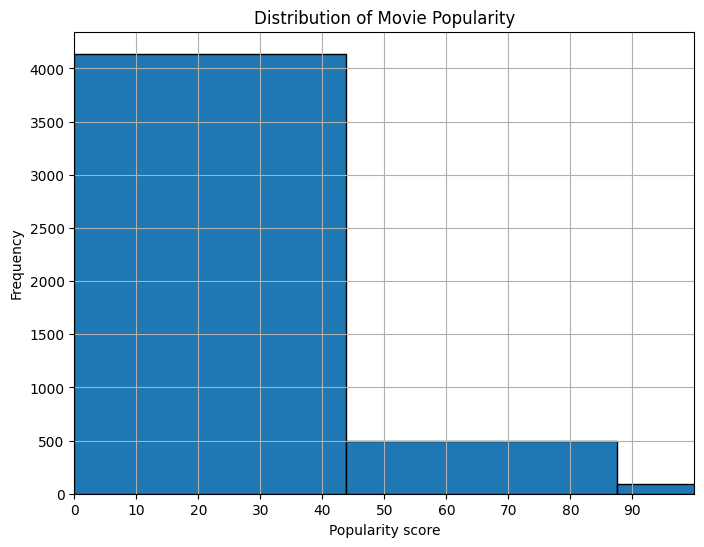

In [95]:
# Plot the histogram for movie popularity
plt.figure(figsize=(8, 6))
plt.hist(movies['Movie_Popularity'], bins=20, edgecolor='black')
plt.xticks(np.arange(min(movies['Movie_Popularity']), max(movies['Movie_Popularity'])+10,10))
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity score')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim(0, 100)
plt.show()

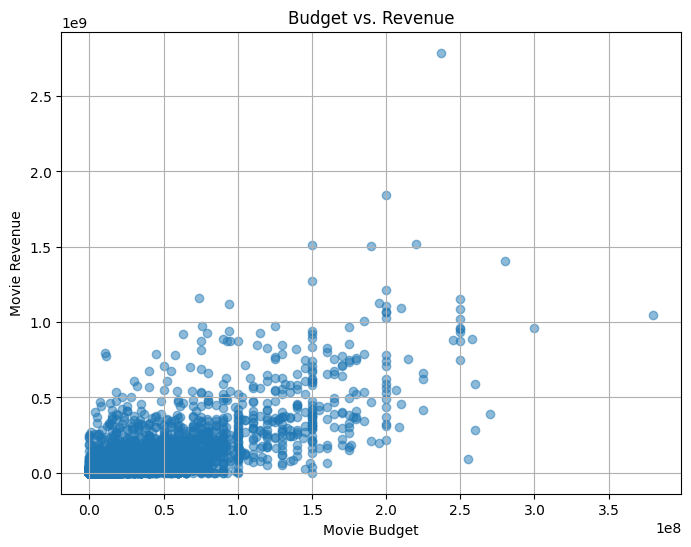

In [96]:
#Budget vs Revenue Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(movies['Movie_Budget'], movies['Movie_Revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Movie Revenue')
plt.grid(True)
plt.show()

# **Data Prepoceesing**

In [97]:
movies.isnull().sum()

,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,2
Movie_Vote,0


In [98]:
#filling null values
movies[["Movie_Director","Movie_Cast","Movie_Tagline","Movie_Overview","Movie_Runtime","Movie_Homepage","Movie_Keywords"]]=movies[["Movie_Director","Movie_Cast","Movie_Tagline","Movie_Overview","Movie_Runtime","Movie_Homepage","Movie_Keywords"]].fillna(" ")


In [99]:
movies.isnull().sum()

,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,0
Movie_Vote,0


In [100]:
movies.duplicated().sum()

0

In [101]:
movies.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

#**Feature Selection**

In [102]:
movie_features=movies[["Movie_Genre","Movie_Keywords","Movie_Tagline","Movie_Cast","Movie_Director"]]

In [103]:
movie_features.head()

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes


In [104]:
movie_features.shape

(4760, 5)

In [105]:
combined_features=movie_features["Movie_Genre"]+" "+movie_features["Movie_Keywords"]+" "+movie_features["Movie_Tagline"]+" "+movie_features["Movie_Cast"]+" "+movie_features["Movie_Director"]

In [106]:
combined_features

,0
0,Crime Comedy hotel new year's eve witch bet ho...
1,Adventure Action Science Fiction android galax...
2,Animation Family father son relationship harbo...
3,Comedy Drama Romance vietnam veteran hippie me...
4,Drama male nudity female nudity adultery midli...
...,...
4755,Horror The hot spot where Satan's waitin'. L...
4756,Comedy Family Drama It’s better to stand out...
4757,Thriller Drama christian film sex trafficking ...
4758,Family


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [108]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [109]:
print(feature_vectors)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	0.07

In [110]:
feature_vectors.shape

(4760, 17258)

In [111]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(feature_vectors)

In [112]:
similarity

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [113]:
similarity.shape

(4760, 4760)

In [114]:
movie_name=input("Enter Movie Name: ")

Enter Movie Name: 


In [115]:
movie_names=movies["Movie_Title"].tolist()

In [116]:
movie_names

['Four Rooms',
 'Star Wars',
 'Finding Nemo',
 'Forrest Gump',
 'American Beauty',
 'Dancer in the Dark',
 'The Fifth Element',
 'Metropolis',
 'My Life Without Me',
 'Pirates of the Caribbean: The Curse of the Black Pearl',
 'Kill Bill: Vol. 1',
 'Jarhead',
 'Apocalypse Now',
 'Unforgiven',
 'The Simpsons Movie',
 'Eternal Sunshine of the Spotless Mind',
 'Amores perros',
 "Pirates of the Caribbean: Dead Man's Chest",
 'A History of Violence',
 '2001: A Space Odyssey',
 '8 Mile',
 'Absolute Power',
 'Brazil',
 'Walk the Line',
 'Million Dollar Baby',
 'Billy Elliot',
 'American History X',
 'War of the Worlds',
 'Mars Attacks!',
 'Before Sunrise',
 'Memento',
 'Blade Runner',
 'Hero',
 'Before Sunset',
 'Open Water',
 'Raiders of the Lost Ark',
 'Indiana Jones and the Temple of Doom',
 'Indiana Jones and the Last Crusade',
 'Beverly Hills Cop',
 'Armageddon',
 'Beverly Hills Cop II',
 'Gladiator',
 'Lock, Stock and Two Smoking Barrels',
 'Taxi Driver',
 'Run Lola Run',
 'Back to the F

In [117]:
import difflib

In [118]:
find_close_match=difflib.get_close_matches(movie_name,movie_names)

In [119]:
find_close_match

[]

In [120]:
close_match=find_close_match[0]
close_match

IndexError: list index out of range

In [121]:
#index of close match
index_of_movie=movies[movies["Movie_Title"]==close_match]["Movie_ID"].values[0]
index_of_movie

2692

In [122]:
#getting similarity score of close match
similarity_score=list(enumerate(similarity[index_of_movie]))
similarity_score

[(0, 0.009805093506053453),
 (1, 0.0),
 (2, 0.0),
 (3, 0.00800429043895183),
 (4, 0.0026759665928032302),
 (5, 0.009639835665946627),
 (6, 0.0049636657561850026),
 (7, 0.012848827437220958),
 (8, 0.0027543335470164663),
 (9, 0.00607882290416431),
 (10, 0.007539724639541887),
 (11, 0.0026263170118314906),
 (12, 0.002708340354961457),
 (13, 0.012904730427356216),
 (14, 0.0),
 (15, 0.022556564866386044),
 (16, 0.005959078936688496),
 (17, 0.0),
 (18, 0.013639824714195078),
 (19, 0.008784739948684396),
 (20, 0.0026527570934446066),
 (21, 0.015211614027840471),
 (22, 0.006522322352622825),
 (23, 0.0026429172195160193),
 (24, 0.0016564482636435309),
 (25, 0.025600660315408176),
 (26, 0.0024815199490618002),
 (27, 0.0047922703978129),
 (28, 0.0),
 (29, 0.023288277583204436),
 (30, 0.004648836119227042),
 (31, 0.006723965537835127),
 (32, 0.007984548069367697),
 (33, 0.018612326068635436),
 (34, 0.007439622267479848),
 (35, 0.0060612328203774185),
 (36, 0.0),
 (37, 0.0),
 (38, 0.00808542827495

In [123]:
sorting_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
sorting_similar_movies

[(2692, 1.0000000000000002),
 (3276, 0.11904275527845871),
 (3779, 0.10185805797079382),
 (62, 0.10153560702418994),
 (2903, 0.10063787314386034),
 (1647, 0.09397055536069451),
 (4614, 0.09362226751043302),
 (4375, 0.09117512301489193),
 (45, 0.08999324643162435),
 (1383, 0.08425242441722802),
 (110, 0.08361784775029485),
 (628, 0.08334515876919323),
 (1994, 0.08287835345252216),
 (2558, 0.08267633224298852),
 (1070, 0.08104448918225104),
 (4378, 0.07894345402700793),
 (1341, 0.07732693809361939),
 (1977, 0.07510309168081497),
 (3465, 0.07411089841255805),
 (3053, 0.0732438108456325),
 (4116, 0.07264153003988619),
 (1982, 0.07246569778553744),
 (2538, 0.06802035746289192),
 (3248, 0.06683400770968473),
 (3946, 0.06577120166835922),
 (3480, 0.06560363079666712),
 (254, 0.06351452702158421),
 (590, 0.06275727122098754),
 (3450, 0.06274272831079739),
 (1886, 0.06267985852941994),
 (4594, 0.0624699521049894),
 (2112, 0.06218435141221765),
 (84, 0.0618237599684129),
 (675, 0.061769915175723

In [124]:
i=1
for movie in sorting_similar_movies:
  index=movie[0]
  tile_of_index=movies[movies["Movie_ID"]==index]["Movie_Title"].values[0]
  if i<11:
    print(i,".",tile_of_index)
    i+=1
  else:
    break

1 . Avatar
2 . The Girl on the Train
3 . Act of Valor
4 . Donnie Darko
5 . Precious
6 . Freaky Friday
7 . The Opposite Sex
8 . Heaven is for Real
9 . Run Lola Run
10 . Elizabethtown


#**Suggesting Similar Movies Based on User Input**

In [125]:
movie_name=input("Enter Movie Name: ")
list_of_all_titles=movies["Movie_Title"].tolist()
close_match=difflib.get_close_matches(movie_name,list_of_all_titles)
close_match=close_match[0]
index_of_movie=movies[movies["Movie_Title"]==close_match]["Movie_ID"].values[0]
similarity_score=list(enumerate(similarity[index_of_movie]))
sorting_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)
i=1
print("Movies suggested for you: ")
for movie in sorting_similar_movies:
  index=movie[0]
  tile_of_index=movies[movies["Movie_ID"]==index]["Movie_Title"].values[0]
  if i<11:
    print(i,".",tile_of_index)
    i+=1
  else:
    break

Enter Movie Name: avataaar
Movies suggested for you: 
1 . Avatar
2 . The Girl on the Train
3 . Act of Valor
4 . Donnie Darko
5 . Precious
6 . Freaky Friday
7 . The Opposite Sex
8 . Heaven is for Real
9 . Run Lola Run
10 . Elizabethtown
